In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import math as m

import yfinance as yf
import matplotlib.pylab as plt
import matplotlib.dates as mdates

from scipy.stats import norm

# Question 1

## A

In [2]:
# initialise the variables necessary for the Weighted Average Cost of Capital (WACC) calculations
erp = 0.0482 # the equity risk premium
r = 0.0425 # the risk-free interest rate
D = 900*(10e6) # ABC's debt portion
E = 2.4*(10e9) # ABC's equity portion
r_D = 0.0925 # the return on debt (Comment on why it was taken as rd)
t_c = 0.375 # the corporate tax rate

# determine the return on equity
r_E = r + erp

# determine the WACC, also known as the return on all assets [r_A]
WoD = D / (D + E) # Weightage of Debt
WoE = E / (D + E) # Weightage of Equity
r_A = (WoD * r_D * (1 - t_c)) + (WoE * r_E)

# print the results
print("The Weighted Average Cost of Capital is: {:.2f}%".format(r_A*100))

The Weighted Average Cost of Capital is: 8.17%


### Working for question 1a

The equation for the Weighted Average Cost of Capital (WACC) after-tax is defined as below:

\begin{equation}
\operatorname{r_{A}}=\frac{\text {D}}{\left(\text {D + E} \right)} \times \left(\operatorname{r_{D}} \times \left(\text{1} - \text{T}_ \text{C}\right)\right) + \frac{\text {E}}{\left(\text {D + E}\right)} \times \operatorname{r_{E}}
\end{equation}

Given our $D$, $E$ and $r_D$ we only need to determine our $r_E$ to complete the calculation for the WACC. 

As we are also given our equity risk premium ($erp$) and our risk-free rate of interest ($r_f$) we can determine our return on equity. This is achieved by doing a simple reworking of the CAPM equation.

CAPM Equation:
\begin{equation}
\mathrm{r}_{\mathrm{E}}=\mathrm{r}_{\mathrm{f}}+\beta \times \left(\mathrm{r}_{\mathrm{M}}-\mathrm{r}_{\mathrm{f}}\right)
\end{equation}

Reworked into the Equity risk premium equation:
\begin{equation}
\mathrm{erp}=\mathrm{r}_{\mathrm{E}}-\mathrm{r}_{\mathrm{f}}=\beta \times \left(\mathrm{r}_{\mathrm{M}}-\mathrm{r}_{\mathrm{f}}\right)
\end{equation}

Therefore, the return on equity will be determined through
\begin{equation}
\mathrm{r}_{\mathrm{E}}=\mathrm{erp}+\mathrm{r}_{\mathrm{f}}
\end{equation}

This is gives us a value of 
\begin{equation}
\operatorname{r_{E}} = \text{4.82\% + 4.25\%} = \text{9.07\%}
\end{equation}

Therefore, we achieve a value for the WACC 
\begin{equation}
\operatorname{r_{A}} = \frac{\text{900} \times \text{10}^{\text{6}}}{\left(\text{900} \times \text{10}^{\text{6}} + \text{2.4} \times \text{10}^{\text{9}}\right)} \times \left(\text{0.0925} \times \left(\text{1} - \text{0.375}\right)\right) + \frac{\text{2.4} \times \text{10}^{\text{9}}}{\left(\text{900} \times \text{10}^{\text{6}} + \text{2.4} \times \text{10}^{\text{9}}\right)} \times \text{0.0907} = \text{8.17\%}
\end{equation}

## B

In [3]:
# initialise the variables necessary for the asset beta calculations prior to the new project
beta_E = 1.3

# We need to determine the asset (unlevered) beta.
# this can be done by dividing the equity (levered) beta by 1+(1-T_c)*debt equity ratio

denom = 1 + ((1 - t_c) * (D / E)) # the denominator of the debt beta equation

beta_A = beta_E / denom # using this to determine the asset beta

# present the results
print("The asset beta prior to the new project is: {0}".format(beta_A))

The asset beta prior to the new project is: 1.0531645569620254


### Working for question 1b

The relationship between the asset (unlevered) beta [$\beta_{A}$] and the equity (levered) beta [$\beta_{E}$] is seen below

\begin{equation}
\operatorname{\beta_{A}} = \frac{\operatorname{\beta_{E}}}{\text{1} + \left(\left(\text{1} - \operatorname{T_{C}}\right) \times \frac{\text{D}}{\text{E}}\right)}
\end{equation}

we already know the value for the corporate tax rate $T_C$, the debt $D$, the equity $E$, and the equity beta $\beta_{E}$. Therefore we can determine [$\beta_{A}$] and achieve a result as seen below

\begin{equation}
\operatorname{\beta_{A}} = \frac{\text{1.3}}{\text{1} + \left(\left(\text{1} - \text{0.375}\right) \times \frac{\text{900} \times \text{10}^{\text{6}}}{\text{2.4} \times \text{10}^{\text{9}}}\right)} = \text{1.1}
\end{equation}

## C

In [4]:
# Assume beta asset is unlevered beta and use the project debt to equity ratio

# initialise the terms used to determine the equity beta of a project
epp = 20 * 10e6 # the equity portion of the project
dpp = 80 * 10e6 # the debt portion of the project

# we use the same asset beta as stated in the question
beta_PE = beta_A * (1 + ((1 - t_c) * (dpp / epp))) # the project equity beta

# present the results
print("The equity beta of the new project is: {0}".format(beta_PE))

The equity beta of the new project is: 3.6860759493670887


### Working for question 1c

We use the same relationship between the asset (unlevered) beta [$\beta_{A}$] and the equity (levered) beta [$\beta_{E}$] as the one used in question 1b, however we will have different values for the debt [$D$] and equity [$E$] portions as we are focussing on the project to achieve the project equity beta.

**$D_{p} = 80 \times 10^{6}$**

**$E_{p} = 20 \times 10^{6}$**

Thus we can re-arrange the 

\begin{equation}
\operatorname{\beta_{E'}} = \operatorname{\beta_{A}} \times \left(\text{1} + \left(\left(\text{1} - \operatorname{T_{C}}\right) \times \frac{\text{D}_ \text{p}}{\text{E}_ \text{p}}\right)\right)
\end{equation}

we already know the value for the corporate tax rate $T_C$, the debt $D_{p}$, the equity $E_{p}$, and the asset beta $\beta_{A}$. Therefore we can determine the project equity beta [$\beta_{E'}$] and achieve a result as seen below

\begin{equation}
\operatorname{\beta_{E'}} = \text{1.1} \times \left(\text{1} + \left(\left(\text{1} - \text{0.375}\right) \times \frac{\text{80} \times \text{10}^{\text{6}}}{\text{20} \times \text{10}^{\text{6}}}\right)\right) = \text{3.7}
\end{equation}

## D

In [5]:
# Initialising the 3 rows of exhibit 2
rev = [99.2, 109.6, 115.44] # Revenues
OC = [32, 36, 38] # operating cost
dep = [16, 16, 16] # depreciation

# create a dataframe that holds all the info for exhibit 2
dictionary = {'Revenues': rev, 'Operating Cost': OC, 'Depreciation': dep}
epf = pd.DataFrame(data = dictionary, index = ['Year 1', 'Year 2', 'Year 3']) # estimated project financials

# creating a function to calculate the fcf of entered data
def get_fcf(row):
    return ((row['Revenues'] - row['Operating Cost'] - row['Depreciation']) * (1 - t_c)) + row['Depreciation']

# creating a new column to add to the epf data frame with the corresponding fcf for each year
epf['FCF [mil]'] = epf.apply(get_fcf, axis = 1)
epf

,Revenues,Operating Cost,Depreciation,FCF [mil]
Year 1,99.20,32,16,48.0
Year 2,109.60,36,16,52.0
Year 3,115.44,38,16,54.4


### Working for question 1d

Given our information in 'Exhibit 2: Estimated Project Financials' we can determine our Free Cash Flow (FCF) for the 3 years of data on the project. The equation given for the FCF,

\begin{equation}
\text{FCF} = \left(\text{Revenues} - \text{Operating Cost} - \text{Depreciation}\right) \times \left(\text{1} - \text{Tax Rate}\right) + \text{Depreciation}
\end{equation}

Therefore, with the tax rate being $37.5%$ we determine the value for the next 3 years to be $48$ million, $52$ million and $54.4$ million. 

## E

In [6]:
values = []
values.append(-100) # adding the original $100mil investment
for z in range(len(epf['FCF [mil]'])):
    values.append(epf['FCF [mil]'][z]) # add the fcf values to the list

# As we have initialised all the variables needed we can directly determine the NPV using the numpy_financial library
print("The NPV, of the project, at a Risk-Free interest rate of ", r, " is {:.2f}".format(npf.npv(r, values)))

# Same goes for the IRR (make a new one with the function built)
print("\nThe IRR value is: ", npf.irr(values))

The NPV, of the project, at a Risk-Free interest rate of  0.0425  is 41.90

The IRR value is:  0.2469145404466444


### Working on question 1e

**Working for the NPV**

We determine the NPV by using its equation:

\begin{equation}
\operatorname{NPV} = \frac{\operatorname{FCF_{t}}}{\left(\text{1} + \operatorname{r}\right)^{t}}
\end{equation}

Therefore, we compute the result by summing the results from $1$ to $t$:

\begin{equation}
\operatorname{NPV} = \frac{\text{48}}{\left(\text{1 + 0.0425}\right)^{1}} + \frac{\text{52}}{\left(\text{1 + 0.0425}\right)^{2}} + \frac{\text{54.4}}{\left(\text{1 + 0.0425}\right)^{3}} = \text{147.94 million}
\end{equation}

**Working for IRR**

We determine the $IRR$ by using it's equation:

\begin{equation}
\operatorname{NPV} = \text{0} =  \frac{\operatorname{FCF_{t}}}{\left(\text{1} + \operatorname{IRR}\right)^{t}} - \operatorname{C_{0}}
\end{equation}

With the $NPV$ value being 0 we solve for the $IRR$. In addition, we also know that $C_0$ is the original investment of $100$ million

The $IRR$ is then determined to be:

\begin{equation}
\operatorname{IRR} = \text{0.247}
\end{equation}

## F

In [7]:
# create a function to determine the current value of DEF stock
def ddm(booming = True):
    # initialising the original dividend and a variable to determine which time period
    d0 = 0.65
    t = 1
    rate = 1
    ror = 0.0735
    
    # create a while loop for the infinite series of the ddm model
    while True:
        if (t < 5 and booming): # the condition for when economy is booming and to have growth of 12%
            g = 1.12
        else:
            g = 1.035
            
        rate *= g

        num = d0 * rate # the numerator
        den = (1 + ror)**t # the denominator
        
        if (num / den) < 10e-8: # when the addition of ddm becomes negligable to the current value
            break
        
        t += 1 # incrementing the time period for each loop
        yield num / den # returning a lazy iterator to compute an infinite series

rise_econ = sum(ddm(booming = True)) # when we have a booming economy
fall_econ = sum(ddm(booming = False)) # when we have a falling economy

print("When the economy is booming we have the stock current value of: ${:.2f}".format(rise_econ))
print("\nWhen the economy is falling we have the stock current value of: ${:.2f}".format(fall_econ))

When the economy is booming we have the stock current value of: $23.60

When the economy is falling we have the stock current value of: $17.47


### Working on question 1f

We know the discount dividend model (DDM) to be:

\begin{equation}
\operatorname{P_{\text{current value of stock}}} = \sum_{t = 1}^\infty \frac{\operatorname{D_{\text{t}}}}{\left(\text{1} + \operatorname{r}\right)^{\text{t}}}
\end{equation}

where $D_t$ is equivalent to $D_0 \times g^t$. $g$ is the growth the dividend will face.

Therefore we need to re-apply this model for the two scenarios given:

*Economy is booming*

In this case the first 4 time periods will have a growth $g$ of $12$% while than stabilizing at a $3.5$% growth for the remainder. Therefore the current value of company DEF stock will be compute:

\begin{equation}
\operatorname{P_{\text{booming}}} = \sum_{t = 1}^{H} \frac{\text{0.65} \times \text{1.12}^{\text{t}}}{\left(\text{1} + \text{0.0735}\right)^{\text{t}}} + \sum_{t = 5}^\infty \frac{\text{0.65} \times g_{t}}{\left(\text{1} + \text{0.0735}\right)^{\text{t}}} = \$\text{23.60}
\end{equation}

where the original value of $g_{t}$ is $1.12^{4}$ and will then be multiplied by $1.035$ for each iteration of $t$, as follows $g_{t} = g_{t} \times 1.035$


*Economy is in recession*

In this case the growth is stable at a growth rate $g$ of $3.5$%, which means we will compute the equation shown below:

\begin{equation}
\operatorname{P_{\text{recession}}} = \sum_{t = 1}^\infty \frac{\text{0.65} \times \text{1.035}^{\text{t}}}{\left(\text{1} + \text{0.0735}\right)^{\text{t}}} = \$\text{17.47}
\end{equation}

## G

In [8]:
# initializing the variables required for the calculations in this question
b = 0.6 # plowback ratio
eps = 2 # Earnings Per Share
roe = 0.14 # return on equity (for company GHI)
ror = 0.11 # rate of return

# determing the sustainable growth rate g
g = roe * b 
print("The sustainable growth rate of company GHI: ", g)

# determine thevalue of the company's stock at the beginning of 2022
# EPS remains the same
por = 1 - b # the payout ratio

# we know that the payout ratio also is the ratio of the dividends to the EPS thus we can determine the d_0
d_1 = eps * por

# we can therefore determine the value of the company stock to be
p_0 = d_1 / (ror - g)
print("\nThe value of the company GHI's stock: ${:.2f}".format(p_0))

# we can now determine the present value of growth opportunity
# use the relationship between stock price and earnings to achieve this result
pvgo = p_0 - (eps / ror)
print("\nThe present value of growth opportunities: {:.2f}".format(pvgo))

The sustainable growth rate of company GHI:  0.084

The value of the company GHI's stock: $30.77

The present value of growth opportunities: 12.59


### Working for question 1g

**Sustainable Growth Rate [$g$]**

To determine the sustainable growth rate we follow the equation below:

\begin{equation}
\operatorname{g} = \operatorname{b} \times \operatorname{ROE}
\end{equation}

where $b$ is the plowback ratio

We are given both the plowback ratio and the return on equity therefore we can determine the sustainable growth to be

\begin{equation}
\operatorname{g} = \text{0.6} \times \text{0.14} = \text{0.084}
\end{equation}

**The Value of the Company's Stock [$P_{company's stock value}$]**

We will be able to determine the value of the company's stock by modelling the value of a business as the value of growing perpetuity:

\begin{equation}
\operatorname{P_{\text{Company's stock value}}} = \frac{\operatorname{D_{\text{0}}} \times \left(\text{1} + \operatorname{g}\right)}{\operatorname{r} - \operatorname{g}}
\end{equation}

We first need to determine the value for the current dividend $D_0$:

\begin{equation}
\operatorname{D_{\text{0}}} = \operatorname{EPS} \times \operatorname{Payout ratio}
\end{equation}

Furthermore, the payout ratio is known to be $1 - b$, where $b$ is the plowback ratio. Therefore, we know the payout ratio to be $0.4$

Thus, the current dividend is:

\begin{equation}
\operatorname{D_{\text{0}}} = 2 \times 0.4 = 0.8
\end{equation}

To conclude, we can now determine the value of the stock, which will give us:

\begin{equation}
\operatorname{P_{\text{Company's stock value}}} = \frac{0.8 \times \left(1 + 0.084\right)}{0.11 \times 0.084} = \$33.35
\end{equation}

**The Company's Present Value of Growth Opportunities [$PVGO$]**

We can utilise the relationship between the stock price and earnings to determine the present value of growth opportunities. This is achieved by re-arranging the above relationship into:

\begin{equation}
\operatorname{PVGO} = \operatorname{P_{\text{Company's stock value}}} - \frac{\operatorname{EPS}}{\operatorname{r}}
\end{equation}

As we determine the value of the company's stock previously we can determine the $PVGO$ to be:

\begin{equation}
\operatorname{PVGO} = 33.35 - \frac{2}{0.11} = 15.17
\end{equation}

# Question 2

In [167]:
# inputs exhibit 1
maturities = [1, 2, 3, 4, 5]
par_rates = [2.5, 2.99, 3.48, 3.95, 4.37]
spot_rates = [2.5, 3.0, 3.5, 4.0, np.nan]
curve_data = {'Mat' : maturities,
              'Par' : [x / 100 for x in par_rates],
              'Spot': [x / 100 for x in spot_rates]
             }
curve_data = pd.DataFrame.from_dict(curve_data)

# inputs exhibit 2
bond_names = ['A', 'B', 'C']
FV = [1000, 1000, 1000]
maturities = [3, 3, 3]
coupon = [6.0, 4.4, 4.4]
type_bond = ['Vanilla', 'Callable', 'Putable']
idx_option = [np.nan, [1, 2], [1, 2]] # years in which bond can be recalled (by issuer or holder)
bond_data = {'Name'  : bond_names,
             'FV'    : FV,
             'Mat'   : maturities,
             'Cpn'   : [x / 100 for x in coupon],
             'Type'  : type_bond,
             'Idx_op': idx_option
            }
bond_data = pd.DataFrame.from_dict(bond_data)
# inputs exhibit 3
data_ir = [[2.2500, 3.5930, 4.6470], 
           [np.nan, 2.9417, 3.8046],
           [np.nan, np.nan, 3.1150]]

ir_tree = np.array([[i / 100 for i in data_ir[j]] 
                        for j in range(len(data_ir[1]))])

In [168]:
def discount_factors(spot_rates, mats):
    df = 1 / ((1 + spot_rates)**mats)
    return df

def spot_rates_calc(df_cumsum, par_value, par_rates, mats):
    spot_rate = ((par_value * (1 + par_rates)) / 
                 (par_value * (1 - par_rates * df_cumsum)))**(1 / mats) - 1
    return spot_rate

def bond_cashflow(T, par_value, coupon_rate):
    cfs = np.zeros(T)
    for t in range(T):
        if (t < T):
            cash_flow = par_value * coupon_rate
        if (t == T - 1):
            cash_flow = par_value * (1 + coupon_rate)
            
        cfs[t] = cash_flow
        
    return cfs


Vanilla
 [[1036.88232314 1009.419295    997.63968389]
 [          nan 1023.00505583 1005.73577664]
 [          nan           nan 1012.46181448]]

Callable
 [[1021.02689487 1006.65087597  997.63968389]
 [          nan 1014.16627081 1005.73577664]
 [          nan           nan 1012.46181448]]

Putable
 [[1037.43940171 1010.55852067  997.63968389]
 [          nan 1023.00505583 1005.73577664]
 [          nan           nan 1012.46181448]]


## A

In [169]:
# inputs
mat = 5 # chosen maturity (years)
par_value = 100

# calculate discount factors
curve_data['DF'] = discount_factors(curve_data['Spot'].values, curve_data['Mat'].values)
curve_data['Cum_DF'] = curve_data['DF'].cumsum()

# calculate spot rate for chosen maturity
idx = curve_data['Mat'] == mat
idx2 = idx.shift(-1)
idx2[mat-1] = False
curve_data.loc[idx, 'Spot'] = spot_rates_calc(curve_data['Cum_DF'][idx2].values, 
                                              par_value, 
                                              curve_data['Par'][idx].values, 
                                              curve_data['Mat'][idx].values)

# recalculate discount factors for all maturities
curve_data['DF'] = discount_factors(curve_data['Spot'].values,
                                   curve_data['Mat'].values)
curve_data.drop(['Cum_DF'], axis = 1, inplace = True) # delete col
print(curve_data) # display table

print("\nFive-year spot rate is {:.2f}%".format(curve_data["Spot"][4] * 100))

   Mat     Par     Spot        DF
0    1  0.0250  0.02500  0.975610
1    2  0.0299  0.03000  0.942596
2    3  0.0348  0.03500  0.901943
3    4  0.0395  0.04000  0.854804
4    5  0.0437  0.04453  0.804258

Five-year spot rate is 4.45%


### Working for question 2a

\begin{equation} 
    100 = \frac{\text {4.37\%}}{\left(\text ({1 + 2.5}) \right)} + \frac{\text {4.37\%}}{\left(\text ({1 + 2.99})^2 \right)} + \frac{\text {4.37\%}}{\left(\text ({1 + 3.48})^3 \right)} + \frac{\text {4.37\%}}{\left(\text ({1 + 3.95})^4 \right)} + \frac{\text {4.37\%}}{\left(\text ({1 + X})^5 \right)}
\end{equation}

then we solve for X to find the spot rate. 

## B

In [170]:
# inputs
mat1 = 3 # loan maturity
mat2 = 4 # loan start, mat2 > mat1

# select spot rate for chosen maturities
spotrate1 = curve_data.Spot[curve_data.Mat == mat1].values
spotrate2 = curve_data.Spot[curve_data.Mat == mat2].values
fwd_rate = (((1 + spotrate2)**mat2) / ((1 + spotrate1)**mat1)) - 1

print("Forward rate is {:.2f}%".format(fwd_rate[0] *100 ))

Forward rate is 5.51%


### Working for question 2b

Finding the forward interest rate can be achieved with the following equation

\begin{equation}
\operatorname{R_{\text{f}}} = \frac{R_{\text{2}}T_{\text{2}} - R_{\text{1}}T_{\text{1}}}{T_{\text{2}} - T_{\text{1}}}
\end{equation}


$R_1$ = zero rate for $T_1$ <br>
$R_2$ = zero rate for $T_2$ <br>
$R_f$ = forward interest rate for the period between $T_2$ and $T_2$ <br>

Since we want the one-year forward rate in three years, we would set $T_1$ = 3 and $T_2$ = 4, and get the appropriate spot rates



## C

* n = 1, n combos = 0
* n = 2, n combos = 2  : 2y1y, 1y2y 
* n = 3, n combos = 6  : 3y1y, 1y3y, 3y2y, 2y3y [...]
* n = 4, n combos = 12 : 4y1y, 1y4y, 3y4y, 4y3y, 4y2y, 2y4y [...]

<p style = 'text-align: justify;'>Given n consecutive points on spot curve, the number of forward rates is equal to n combos. For one point only, there is no forward rate that can be calculated. For a spot curve with more than two points, the number of forward rate combinations equals the cumulative number of combinations up to (and including) that point. For instance, given spot rates for one-, two-, and three-year zero bonds, 6 forward rates can be calculated: 2y1y and 1y2y are the forward rates that can be already calculated with 2 points (1y, and 2y spot), then with the added 3y point (on the spot curve) we count 4 combinations, making the total $\text{n combos} = 6$. Extending the curve to 4 points we count 12 forward rate combinations, and we derive the formula: </p>

$$ \text{n combos} = n (n -1) \quad \forall n >= 1 $$

## D

In [171]:
# inputs
bond_name = 'A' # bond name

# bond-specific info
idx = (bond_data['Name'] == bond_name)
T = bond_data['Mat'][idx].values[0]
fv = bond_data['FV'][idx].values[0]
cpn = bond_data['Cpn'][idx].values[0]

# calculate bond cash flows (T x 1)
cashFlows = bond_cashflow(T, fv, cpn) # without initial investment
initial_inv = np.array([-bond_data['FV'][idx].values[0]])
cashflows = np.concatenate((initial_inv, cashFlows), axis = 0)

# find IRR
irr = npf.irr(cashflows)
print("Yield to maturity is {:.2f}%".format(irr * 100))

Yield to maturity is 6.00%


### Working for question 2d

The IRR (Internal Rate of Return) function returns the periodically compounded rate of return that gives a net present value of 0.
We would only need to provide a list of all cashflows and since the maturity is 3 years, we would get the cashflows [-1000, 60, 60, 1060].
The coupon payment is worth 60 after multiplying the face value with the 6% annual coupon.

The equation would look as follows:

\begin{equation}
-1000 + \frac{60}{1 + r} + \frac{60}{(1 + r)^{\text{2}}} + \frac{1060}{(1 + r)^{\text{3}}} = 0
\end{equation}

where r is our yield to maturity


## E

In [176]:
def adjust_bond_type(value, par_value, type = "Vanilla"):
    if type == "Callable":
        return min(value, par_value)
    elif type == "Putable":
        return max(value, par_value)
    else:
        return value

def discount_bond_tree(x, y, bond_tree, ir_tree, discounted_tree, type = "Vanilla", par_value = 1000, p_up = 0.5, p_down = 0.5):
    current_value = bond_tree[x][y] / (1 + ir_tree[x][y])
    children_value = 0
    if y + 1 < len(bond_tree):
        up = discount_bond_tree(x, y + 1, bond_tree, ir_tree, discounted_tree, type)
        up = adjust_bond_type(up, par_value, type)
        down = discount_bond_tree(x + 1, y + 1, bond_tree, ir_tree, discounted_tree, type)
        down = adjust_bond_type(down, par_value, type)
        children_value = (p_up * up + p_down * down) / (1 + ir_tree[x][y])
    
    discounted_tree[x][y] = current_value + children_value
    return current_value + children_value

def price_bond_tree(bond_name, bond_data, ir_tree, p_up, p_down):
    # bond-specific info
    idx = (bond_data['Name'] == bond_name)
    T = bond_data['Mat'][idx].values[0]
    fv = bond_data['FV'][idx].values[0]
    cpn = bond_data['Cpn'][idx].values[0]
    type_bond = bond_data['Type'][idx].values[0]
    idx_op = bond_data['Idx_op'][idx].values[0]
    
    # initialise tree
    bond_tree = np.empty([T, T])
    bond_tree[:] = np.nan
    
    # cashflows
    for i in range(0, T):
        if (i == T - 1):
            bond_tree[:, i] = [fv * (1 + cpn)] * (i + 1)
        else:
            node_new = [fv * cpn] * (i + 1)
            bond_tree[:, i] = np.concatenate((np.array(node_new), [np.nan] * (T - i - 1)))
    
    # print("Cashflows\n", bond_tree)
    
    # # interest rates
    # print("\nInterest Rates\n", ir_tree)
    
    # discounted cashflows
    discounted_bond_tree = np.empty([T, T])
    discounted_bond_tree[:] = np.nan
    
    # recursive function to discount all cashflows with the current and previous interest rates + sum them
    discount_bond_tree(0, 0, bond_tree, ir_tree, discounted_bond_tree, type_bond, fv, p_up, p_down)

    return discounted_bond_tree

# inputs
p_up = 0.5
p_down = 0.5

# step 1: price a bullet (vanilla/straight) bond with the same characteristics as bonds B and C
bond_name = 'B'
aux_df = bond_data.copy()
aux_df.loc[aux_df.Name == bond_name, 'Type'] = 'Vanilla'
aux_df.loc[aux_df.Name == bond_name, 'Idx_op'] = np.nan
aux_df = aux_df.loc[aux_df.Name == bond_name, :]
vanilla_bond_tree = price_bond_tree(bond_name, aux_df, ir_tree, p_up, p_down)
print("\nVanilla\n", vanilla_bond_tree)
print("Value of Vanilla bond is {:.2f}".format(vanilla_bond_tree[0][0]))

# step 2: price callable and putable bonds
bond_name = 'B' # bond name
b_bond_tree = price_bond_tree(bond_name, bond_data, ir_tree, p_up, p_down)
bond_name = 'C' # bond name
c_bond_tree = price_bond_tree(bond_name, bond_data, ir_tree, p_up, p_down)

print("\nCallable\n", b_bond_tree)
print("Value of bond B is {:.2f}".format(b_bond_tree[0][0]))
print("\nPutable\n", c_bond_tree)
print("Value of bond C is {:.2f}".format(c_bond_tree[0][0]))


Vanilla
 [[1036.88232314 1009.419295    997.63968389]
 [          nan 1023.00505583 1005.73577664]
 [          nan           nan 1012.46181448]]
Value of Vanilla bond is 1036.88

Callable
 [[1021.02689487 1006.65087597  997.63968389]
 [          nan 1014.16627081 1005.73577664]
 [          nan           nan 1012.46181448]]
Value of bond B is 1021.03

Putable
 [[1037.43940171 1010.55852067  997.63968389]
 [          nan 1023.00505583 1005.73577664]
 [          nan           nan 1012.46181448]]
Value of bond C is 1037.44


### Working for question 2e

**Results**

Bond B (callable) < Vanilla Bond < Bond C (putable)

- The price of a callable bond is always lower than the price of a straight bond, because the call option adds value to the issuer. 
- The price of a puttable bond is always higher than the price of a straight bond, due to the option premium (put) that the investors pay to the issuer.

**Steps**

We assume a par value of 1000 USD like in bond A from exhibit 2. The overall method of finding the value of bonds B and C is backward induction methodology where we start from the leafs of the binomial tree and go backwards to the root.

The code first sets the interest rates for each tree node taken from exhibit 3.<br>
[0.0225, 0.03593, 0.04647]<br>
[nan, 0.029417, 0.038046]<br>
[nan, nan, 0.03115]<br>

Then, we can calculate the bond's cashflows with par value of 1000 and coupon rate of 4.4%.<br>
[44, 44, 1044]<br>
[nan, 44, 1044]<br>
[nan, nan, 1044]<br>

The cashflows can then be discounted by the corresponding interest rates and summed together considering the 0.5 interest probability of going up and down. A breakdown of the equations can be see below:<br>
\begin{equation}
Suu = \frac{1000 + 44}{1 + 0.04647}
\end{equation}
\begin{equation}
Suu = \frac{parValue + coupon}{1 + ruu}
\end{equation}
\begin{equation}
Sud = \frac{parValue + coupon}{1 + rud}
\end{equation}
\begin{equation}
Sdd = \frac{parValue + coupon}{1 + rdd}
\end{equation}
\begin{equation}
Su = \frac{pUp * Suu + pDown * Sud + coupon}{1 + ru}
\end{equation}
\begin{equation}
Sd = \frac{pUp * Sud + pDown * Sdd + coupon}{1 + rd}
\end{equation}
\begin{equation}
S = \frac{pUp * Su + pDown * Sd + coupon}{1 + r}
\end{equation}

**Callable**

Since bond B is callable at the start of year 1 and 2, the issuer can redeem the bond when it is about to exceed the par value (1000 USD). 
In this case, the issuer can pay off the bond at 1000 and issue a new one at a lower interest rate. Adjusting the algorithm to tak the minimum of the par value and the computed bond price during the backward valuation would meet this additional feature.

\begin{equation}
Su = \frac{pUp * min(Suu, 1000) + pDown * min(Sud, 1000) + coupon}{1 + ru}
\end{equation}

Note: the same modifications apply to Sd and S

**Putable**

Bond C is putable at the start of year 1 and 2, meaning that the investor can redeem the bond at 1000 when the computed bond price is less than 1000 USD. In this case, we will do the opposite of call and take the maximum of the computed bond price and the par value.

\begin{equation}
Su = \frac{pUp * max(Suu, 1000) + pDown * max(Sud, 1000) + coupon}{1 + ru}
\end{equation}

Note: the same modifications apply to Sd and S



## F

<p style = 'text-align: justify;'>A fall in interest rates on the vanilla (bullet) bond with the same characteristics as B and C (price=1036.88), causes the bond to appreciate since future cash flows are discounted at at a lower rate (price new > price). 

<p style = 'text-align: justify;'>Bond B is callable, offering the issuer the option to recall/redeem the bond at a specified price (par in this case) during certain periods before maturity (start of year 1 and year 2). An issuer may choose to recall a bond if it forecasts lower interest rates, so that it can proceed to re-issue the bond at a lower rate. A fall in interest rates makes it more likely for the issuer to redeem a callable bond, which is reflected in the price of the option embedded in the bond (option value = vanilla bond price - callable/putable bond price). When an issuer sells a callable bond, it also sells (writes) a call option: the option writer gets the premium up-front, but has a downside if the option is exercised. In case of a fall in interest rates, the option is more likely to be exercised and its premium (price) increases. The issuer has to offer a discount (relative to the vanilla bond) in order to attract investors. Everything else being equal, the fall in interest rates causes the price of bond B to be wider relative to its vanilla counterpart (which increases in the first place because of a fall in interest rates).

<p style = 'text-align: justify;'>Bond C is putable, which means that the bond-holder has the right to demand early repayment of the principal (it protects investors, contrarily to a callable bond which protects the issuer). The price behaviour of puttable bonds is the opposite of that of a callable bond, because the issuer effectively sells (writes) a put option to the investors. In case of a fall in interest rates, it is less likely that the investors sell the bond back to the issuer (before maturity) and do not benefit from the low rates environment. The issuer writes a put and receives the premium, and after the fall in interest rates the price of the put is lower with respect to its initial level. Everything else being equal, the fall in interest rates causes the price of bond C to be closer relative to its vanilla counterpart (which increases in the first place because of a fall in interest rates). </p>

## G

<p style = 'text-align: justify;'>Because of the optionality embedded in the callable and putable bonds, I analyse the effect of an increase in realised volatility on the option premia (call and put respectively). An increase in realised vol (which translates into higher implied vol) makes the option premia increase equally for puts and calls. When the issuer sells a put to the investor, the price of the putable bond is equal to the vanilla price plus the put premium, thus bond C is most likely to increase in value if interest rate volatility increases. </p>

# Question 3

In [19]:
def d1(stock, strike, r, sigma, T):
    moneyness = m.log(stock / strike)
    shift = r + 0.5 * (sigma**2)
    d1 = (1 / (sigma * m.sqrt(T)) * (moneyness + shift * T))
    return d1
    
def d2(d1, sigma, T):
    d2 = d1 - sigma * m.sqrt(T)
    return d2

def call_option(d1, d2, stock, strike, r, T):
    call = stock * norm.cdf(d1) - m.exp(-r * T) * strike * norm.cdf(d2)
    return call 

def put_option(call_price, S, K, r, T):
    put_price = call_price - S + (K * np.exp(-r * T)) # put-call parity
    return put_price

def num_comb(n, j):
    y = m.factorial(n) / (m.factorial(j) * m.factorial(n - j))
    return y

def binomial_prob(p, n, j):
    y = (p**j) * ((1 - p)**(n - j))
    return y

def stock_price(up, down, n, j, S):
    y = ((up**j) * (down**(n-j)) * S)
    return y

def payoff_call(up, down, n, j, S, K):
    y = np.max((stock_price(up, down, n, j, S) - K, 0))
    return y

def price_option(n, S, K, T, vol, r):
    # inputs
    time_factor = T / n
    up = m.exp(vol * np.sqrt(time_factor)) # up move
    down = 1 / up # down move
    R = m.exp(r * time_factor) # denominator of discount factor
    p = (R - down) / (up - down) # implied probability
    
    # initialise
    partial_prices = np.empty((n, 1))
    payoffs = np.empty((n, 1))
    stock_prices = np.empty((n, 1))
    
    # binomial method
    for j in range(n):
        stock_prices[j] = stock_price(up, down, n, j, S) # stock prices at maturity
        payoffs[j] = payoff_call(up, down, n, j, S, K) # payoffs at maturity
        partial_prices[j] = num_comb(n, j) * binomial_prob(p, n, j) * payoff_call(up, down, n, j, S, K)
    
    # call price
    call_price = (1 / R) * np.sum(partial_prices) 
    # put price
    put_price = call_price - S + (K * np.exp(-r * T)) # put-call parity

    return call_price, put_price, payoffs, stock_prices

## A

<p style = 'text-align: justify;'>Forward Contracts are usually traded Over The Counter (OTC) and do not have a single delivery date. In most cases they are settled at the end of the contract and delivery usually takes place. There is credit risk as the counterparty may not be able to meet the obligation. 

<p style = 'text-align: justify;'>In contrast, a future contract is traded on an exchange. There is a wide range of delivery dates, and the contracts can be closed prior to maturity. There is also no credit risk involved because these instruments are traded on an exchange and a clearing house guarantees against default risk by taking both sides of the trade and marking to market their positions every night.</p>

## B

$T=1y$ ; $F_0=110$

$S_0=100 ; r=2%$

$F_t=S_t(1+r)-div$

$F_t=S_t(1+r(x/365))-div$


$F_0=110$  

$\hat{F_0} = 100(1+0.02)=102 (Fair Price)$

if $\hat{F_0} < F_0$ then $F_0$ will decline -> short the future 

otherwise -> long future
 
 Now:
 - Sell futures contract; 
 - Borrow Stock at risk free rate;
 - Buy Stock;
 
 At time t:
 - delivery of futureds contract
 - pay back the loan

## C

$T=1y$ ; $F_0=95$

$S_0=100 ; r=2%$

$F_t=S_t(1+r)-div$

$F_t=S_t(1+r(x/365))-div$


$F_0=95$  

$\hat{F_0} = 100(1+0.02)=102 (Fair Price)$

if $\hat{F_0} > F_0$ then $F_0$ will increase -> long the future
 
 Now:
 - buy futures contract; 
 - short sell stock;
 - lend the premium collected from short selling at the risk free rate;
 
 At time t:
 - collect interest on loan
 - take the delivery of the futures contract
 - return the borrowed stock (from short selling)

## D

In [20]:
# inputs
S = 57.03 # current stock price
K = 55 # strike
r = 0.22 / 100 # risk-free rate (p.a.)
vol = 0.32 # implied vol (p.a.)
T = 0.25 # time to expiration (in years)

# Black-Scholes price
d1_input = d1(S, K, r, vol, T)
d2_input = d2(d1_input, vol, T)
call_price_BS = call_option(d1_input, d2_input, S, K, r, T)
call_price_BS 

4.694615032107006

## E

To replicate a call consider: 
    Δc units of Stock
    B units of lending 
    
Call = Borrowing B + buying Δ of underlying stock 

## F

In [21]:
# inputs
n = 100 # number of periods in the binomial tree (number of terminal values)

# binomial formula for a European call/put on non-dividend paying stock n periods from expiration
call_price_BN, cut_price_BN, payoffs_BN, stock_prices_BN = price_option(n, S, K, T, vol, r)
call_price_BN

4.696228989748564

## G

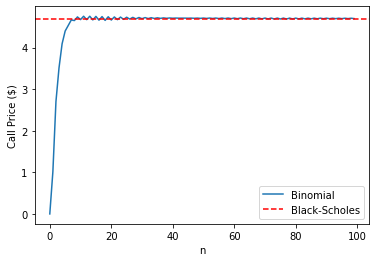

In [22]:
# inputs
N = 100 # number of steps

# calculate option prices using the binomial formula
range_N = range(N)
prices = np.empty([N, 1])

for i in range_N:
    ii = i + 1 # n loop
    call_price_BN, put_price_BN, payoffs_BN, stock_prices_BN = price_option(ii, S, K, T, vol, r)
    prices[i] = call_price_BN

# plot    
fig, ax = plt.subplots()    
ax.plot(range_N, prices)
ax.axhline(y = call_price_BS, color = 'r', linestyle = '--')
ax.legend(['Binomial', 'Black-Scholes'])
plt.xlabel('n')
plt.ylabel('Call Price ($)')
plt.show()

With increasing number of terminal values/steps in the Binomial tree (n), the Binomial price converges to the Black-Scholes price. This is because the binomial tree is in practice a discretisation of the solution in B-S, which is developed in a continous-time framework.  

## H

In [23]:
def call_payoff (S, K, premium):
    return np.where(S > K, S - K, 0) - premium

# inputs
S = 57.03 # current stock price

# long call position
higher_strike_price_long_call = 60
lower_strike_price_long_call = 50
premium_higher_strike_long_call = 5
premium_lower_strike_long_call = 10

# short call position
strike_price_short_call = 55
premium_short_call = 7
sT = np.arange(10, 100, 1) # range of prices

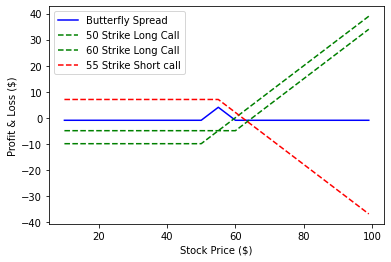

In [24]:
# long call lower strike
lower_strike_long_call_payoff = call_payoff(sT, lower_strike_price_long_call, premium_lower_strike_long_call)

# long call higher strike
higher_strike_long_call_payoff = call_payoff(sT, higher_strike_price_long_call, premium_higher_strike_long_call)

# short call 
short_call_payoff = call_payoff(sT, strike_price_short_call, premium_short_call) * -1

# calculate strategy payoff
butterfly_spread_payoff = lower_strike_long_call_payoff + higher_strike_long_call_payoff + (2 * short_call_payoff)

# plot strategy payoff
fig, ax = plt.subplots()
ax.plot(sT, butterfly_spread_payoff , color = 'b', label = 'Butterfly Spread')
ax.plot(sT, lower_strike_long_call_payoff, '--', color = 'g', label = '50 Strike Long Call')
ax.plot(sT, higher_strike_long_call_payoff, '--', color = 'g', label = '60 Strike Long Call')
ax.plot(sT, short_call_payoff, '--', color='r', label = '55 Strike Short call')
plt.legend()
plt.xlabel('Stock Price ($)')
plt.ylabel('Profit & Loss ($)')
plt.show()

## I

Investors can enter this strategy if they believe that the stock price will stay in between K1 and K3. The profit is maximized when the stock price lies in the middle of these two strike prices at expiry. Therefore in a low volatility environment this strategy can yield nice short term returns for investors. 

# Question 4

## A

In [25]:
# inputs
tickers = ['GOOG', 'AAPL', 'AMZN', 'FB']
start_date = '2017-01-01'
end_date = '2020-12-31'
freq = '1d' # daily

# download data using yahoo finance API
data_df = yf.download(tickers, 
                      start = start_date,
                      end = end_date,
                      interval = freq,
                      progress = False,
                      auto_adjust = True)

# calculate arithmetic (simple) returns on closing end-of-day prices
simple_return = ((data_df.Close / data_df.Close.shift(1)) - 1) 
simple_return = simple_return.iloc[1:, :].dropna() # delete nans

# calculate cumulative returns
cum_ret = simple_return.apply(lambda x : (x+1).cumprod()) -1
simple_return.head()

,AAPL,AMZN,FB,GOOG
Date,,,,
2017-01-04,-0.001119,0.004657,0.015660,0.000967
2017-01-05,0.005085,0.030732,0.016682,0.009048
2017-01-06,0.011148,0.019912,0.022707,0.015277
2017-01-09,0.009160,0.001168,0.012074,0.000620
2017-01-10,0.001009,-0.001280,-0.004404,-0.002306


## B

In [26]:
# calculate sample covariance
cov_matrix = np.cov(simple_return.T, bias = True)

# structure dataframe
cov_matrix_aux = pd.DataFrame(data = cov_matrix,
                             columns = tickers,
                             index = tickers)
cov_matrix_aux

,GOOG,AAPL,AMZN,FB
GOOG,0.000398,0.000246,0.000263,0.000237
AAPL,0.000246,0.000372,0.000261,0.000230
AMZN,0.000263,0.000261,0.000459,0.000263
FB,0.000237,0.000230,0.000263,0.000306


## C

In [41]:
# calculate weights
n = simple_return.shape[1]
weights = [1 / n] * n

# number of business days in a year in the US
ndays = 252 

# Return part
total_returns = (1 + simple_return).prod()

# All trading days over the past 4 years
N = len(simple_return)

# annualise return values
annualised_return = total_returns ** (ndays / N) - 1

# weighted returns
weighted_annualised_return = annualised_return * weights
final_annualised_return = sum(weighted_annualised_return)

print("Portfolio Annualised Return {:.2f}%".format(final_annualised_return * 100)) # in %

Portfolio Annualised Return 34.74%


In [46]:
# Portfolio variance
w_aux = np.matmul(weights, cov_matrix * ndays) # if it was volatility we would have done * np.sqrt(ndays)
portfolio_variance = np.matmul(w_aux, weights)
portfolio_variance_annual = portfolio_variance
print("Portfolio Annualised Variance (with cov() from np)", portfolio_variance_annual)

# Pandas rounds the cov values sooner than np
portfolio_variance_annual2 = np.dot(weights, np.dot(simple_return.cov() * ndays, weights))
print("Portfolio Annualised Variance (with cov() from pandas)", portfolio_variance_annual2)

Portfolio Annualised Variance (with cov() from np) 0.07141902224626975
Portfolio Annualised Variance (with cov() from pandas) 0.07149015673057879


### Working for question 4c

**Annualised Portfolio Return**<br>
The Annualised Portfolio Return formula is as follows:<br>

\begin{equation}
\operatorname{Annualised Return} =  (TotalReturn)^\frac{252}{N} - 1
\end{equation}

\begin{equation}
\operatorname{Total Return} = \prod_{n = 1}^\N (1 + Return(n))
\end{equation}

where Return is the set of simple returns, N is the total number of trading days, and 252 is the trading days per year.<br>
N can also be interpreted as the total period the investment was held.
To find the final answer, we multiply the resulting annualised return of each company by its weight and sum everything together.

**Portfolio Variance**<br>
Finding the Portfolio Variance can be achieved with:<br>
$Var_p = w' \Sigma w = \sum_{i = 1}^{N} w_{i} w_{j} cov(i, j)$ with $i \neq j$ s.t. $\Sigma$ (NxN) covariance matrix

We have also calculated that over the 4 years, the number of trading days average at 252 <br>
2017 had 251 days, 2018 had 252 days, 2019 had 252 days, 2020 had 253 days

## D

In [29]:
# inputs
rf = 0.01 # zero risk-free rate (p.a.)
N_sim = 1000

# estimate asset moments
means = np.mean(simple_return, axis = 0)

# structure dataframe
means_aux = pd.DataFrame(data = means)

# initialise
mean_variance_pairs = []
weights_list = [] 
tickers_list = []

# calculate efficient frontier
for i in range(N_sim): # simulations
    next_i = False
    while True:
        # draw assets randomly without replacement
        assets = np.random.choice(tickers, n, replace = False)
        
        # draw random weights
        weights = np.random.rand(n)
        weights = weights / sum(weights)
        
        # loop over asset pairs and compute portfolio moments
        portfolio_e_variance = 0
        portfolio_e_return = 0
        
        for i in range(len(assets)):
            portfolio_e_return += weights[i] * means_aux.loc[assets[i]][0]
            
            for j in range(len(assets)):
                portfolio_e_variance += weights[i] * weights[j] * cov_matrix_aux.loc[assets[i], assets[j]]
        
        # delete dominated portfolios (portfolios with ret < avg ret and/or with var > avg var)
        for R, V in mean_variance_pairs:
            if (R > portfolio_e_return) & (V < portfolio_e_variance): # not dominated
                next_i = True
                break
        
        # exit loop condition        
        if next_i:
            break
        
        # append mean/variance pairs
        mean_variance_pairs.append([portfolio_e_return, portfolio_e_variance])
        
        # append weights
        weights_list.append(weights)
        
        # append asset list
        tickers_list.append(assets)
        break

# structure dataframes
mean_variance_pairs_aux = pd.DataFrame(data = mean_variance_pairs,
                                       columns = ['mean', 'var'])

weights_aux = pd.DataFrame(data = weights_list,
                                       columns = tickers)

# calculate max sharpe ratio (from daily estimates)
mean_variance_pairs_aux['SR'] = (mean_variance_pairs_aux['mean'] - (rf / ndays)) / mean_variance_pairs_aux['var'] 
max_SR = np.max(mean_variance_pairs_aux['SR'])
idx_opt = (mean_variance_pairs_aux['SR'] == max_SR).values

In [30]:
weights_aux[idx_opt]

,GOOG,AAPL,AMZN,FB
80,0.266093,0.148581,0.009258,0.576069


In [31]:
max_SR # based on daily figures (means, vars)

5.170062157151543

## E

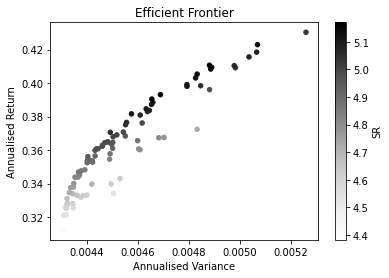

In [32]:
# # annualise values
mean_variance_pairs_aux['mean'] = mean_variance_pairs_aux['mean'] * ndays
mean_variance_pairs_aux['var'] = mean_variance_pairs_aux['var'] * np.sqrt(ndays)

# create plot
ax = mean_variance_pairs_aux.plot.scatter(x = 'var',
                                          y = 'mean',
                                          c = 'SR',
                                          title = 'Efficient Frontier',
                                          sharex = False)
plt.xlabel('Annualised Variance')
plt.ylabel('Annualised Return')
plt.show()
# note: shades of grey represent portfolio sharpe ratios

## F

The current portfolio consists of four US tech stocks which means the portfolio is cyclical. The portfolio includes only largely capitalised companies.

To improve the portfolio diversification, the following should be considered: 
-	Equities unrelated to the economic cycle, examples of non-cyclical stocks are Coca Cola, Walmart, Mc Donalds. Tech stocks perform poorly in high interest rate environments because they are valued using discounted cash flow models. Higher interest rates result in a lower value of the future cashflows of these companies which means that their valuations will decrease and hence the performance of the whole portfolio will suffer. 
-	Emerging market equities including far east in order to diversify the geographical locations of the stocks in the portfolio. 
-	Add stocks with lower market capitalizations. Usually those stocks have higher risk return profiles. By merging small and big caps stocks in a portfolio, you are including stocks with different risk profiles hence the portfolio is being diversified. 
-	Include different asset classes such as bonds, options, mutual funds, indexes, and commodities. This will help to diversify the portfolio on an asset class level and this is the most effective diversification for a portfolio. 


# Question 5

In [33]:
import datetime

# Read the correct xlsx sheet and skip the first two rows
data = pd.read_excel("2015-vbt-smoker-distinct-alb-anb.xlsx", sheet_name="2015 FSM ANB", skiprows=2)

# Set the index to the age for easier indexing
data = data.set_index("Iss. Age")

# Drop Att. Age as it won't be needed in the calculations
data = data.drop(columns=["Att. Age"])

# Divide the data by 1000 to get it for a single person. We can iterate over all columns because the Iss. Age is already in the index and Att. Age was removed
for col in data.columns:
    data[col] /= 1000
 
# 26th period (Ultimate) is treated differently
TOTAL_PERIODS = data.shape[1] - 1
TOTAL_AGE = data.shape[0] - 1 + data.index.min()

# Calculate Alice's age
today =  datetime.datetime(2022, 3, 13)
born = datetime.datetime(1983, 10, 28)
age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))

2015 Valuation Basic Table (VBT) includes the mortality evaluation of male / female, smoker / nonsmoker and age-nearest birthday (ANB) / age-last birthday (ALB).
Since Alice is born on 28th October 1983 and today's date is 13th March 2022, she classifies as 38 years old according to the ANB.
She is also a female smoker which concludes that her mortality rate will be taken for Iss. Age 38 from the 2015 FSM ANB sheet.
The mortality rates are presented per 1000 meaning that we need to divide the data by 1000 to get the % mortality per person.



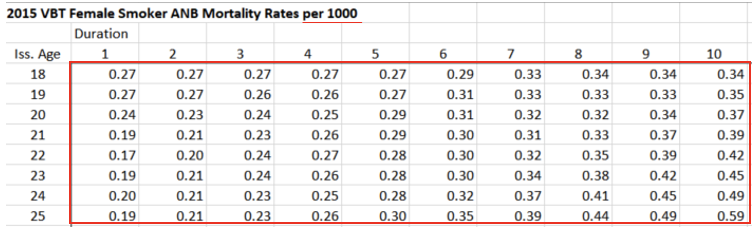

## A

In [34]:
# Survival Rate from age_current to age_survive (not by the end of age_survive)
def survival_rate(data, age_current, age_survive, do_print = False):
    duration = age_survive - age_current
    npx = 1.0
    
    # Multiply all survival rates to indicate that all of them are occurring (survive the full 38, 39, 40 and 41 = survive from 38 to 42)
    for i in range(duration + 1):
        npx = survival_rate_shift(data, npx, age_current, i)
        if (do_print):
            print("Survival Rate to Age " + str(age_current+i) + " is " + str(npx))
        
    return npx

# Survival Rate from age to age + duration. The code was separated into a function for reusability purposes because survavial_rate() is inefficient
def survival_rate_shift(data, npx, age, duration):
    if duration <= 0:
        return 1
    else:
        # Decrease the duration by one because npx takes 1 - n-1qx. Only doing these increase and decrease because I'm using the functions on their own somewhere else.
        return npx * (1 - mortality_rate(data, age, duration - 1))

# Mortality rate taken from the xlsx file
def mortality_rate(data, age, duration):
    if duration < 0:
        return 0
    
    # Increase by one because the n|qx in the xlsx equals duration of n + 1; 0|qx is duration 0 + 1
    duration += 1
        
    if (duration >= TOTAL_PERIODS):
        # We go down the ultimate column when the maximum periods in the row are reached. Note that we also want the Ult for the current age
        return data["Ult."][age + duration - (TOTAL_PERIODS + 1)]
    else:
        return data[duration][age]

sr = survival_rate(data, age, 42, True)

Survival Rate to Age 38 is 1
Survival Rate to Age 39 is 0.99963
Survival Rate to Age 40 is 0.9991001961
Survival Rate to Age 41 is 0.998380843958808
Survival Rate to Age 42 is 0.9975022688161242


### Working for question 5a

The unconditional survival rate npx represents the probability that a person aged x is alive at the end of the nth year. If someone is aged x, he will survive to age $x+n+1$. In our case, we would want Alice to survive to age 42 which will be equivalent to $_{3}$ $p_{38}$ (i.e. alive at the end of $3 + 38 = 41$ or survive to age $3 + 38 + 1 = 42$)

The equation is as follows:


$$ _{n}p_{x} =\begin{equation}
\left\{ 
  \begin{aligned}
    1,& &\text{n}\leq{0}\\
    \prod_{m=0}^{n-1}\,\left(1 - _{m|}q_{x}\right),&   &\text{n}\geq{1}\\   
  \end{aligned}
  \right.
\end{equation}
$$

where

$_{n-1|}q_{x}$ is the probability that a person is dead at the end of the nth year given that he is alive at the end of $(n-1)^{th}$ year:
- $_{0|}q_{38} =$ Alice dies by the end of 39$^{\text{th}}$ age, given she survived 38$^{\text{th}}$ age!
- $_{1|}q_{38} =$ Alice dies by the end of 40$^{\text{th}}$ age, given she survived 39$^{\text{th}}$ age!


$1 - _{n-1|}q_{x}$ is the probability that a person is alive at the end of the nth year, given that he survived at the end of (n-1)th year:
- $1 - _{0|}q_{38} =$ Alice survives by the end of 39$^{\text{th}}$ age, given she survived 38$^{\text{th}}$ age!
- $1 - _{1|}q_{38} =$ Alice survives by the end of 40$^{\text{th}}$ age, given she survived 39$^{\text{th}}$ age!



Note that multiplying these two probabilities is equivalent to both of them occurring.

Therefore,

$$ \begin{equation}
\left(1 - _{0|}q_{38}\right)\left(1 - _{1|}q_{38}\right)\left(1 - _{2|}q_{38}\right)\left(1 - _{3|}q_{38}\right)
\end{equation}
$$

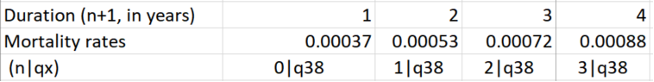

will give us the probability that Alice lives from 38 to at least 42.

## B

In [35]:
# Remaining life Expectancy from given age
def life_expectancy(data, age):
    life_expectancy = 0
    rate = 1
    # Iterate over all periods and all Ultimate values. We have +1 because the iteration stops before the last value
    # Other solution would be to iterate while the survival_rate is higher than a certain threshold like 0.00001
    # +1 because the loop finished 1 value earlier and +1 because we want to consider the Ult value for the current age as well
    for i in range(1, TOTAL_PERIODS + TOTAL_AGE - age + 2):
        rate = survival_rate_shift(data, rate, age, i)
        life_expectancy += rate
        
    # Add 0.5 to give on average that people could life half of their last year
    return (life_expectancy + 0.5)

print("Person is expected to live {:.1f} more years".format(life_expectancy(data, 38)))

Person is expected to live 42.9 more years


### Working for question 5b

The life expectancy of a person aged x is the expected future lifetime given survival to age x, which is shown below [1]

$$
\begin{equation}
LE = E[\text{Lifetime}(x)] = \sum_{n = 0}^\infty n \times \left( _{n}p_{x}\right) \times q_{x+n}
\end{equation}
$$

where 
- $n =$ years lived
- $q_{x + n} =$ probability of living these years

If we substitute $q_{x + n} = \left( _{n}p_{x}\right) - \left( _{n+1}p_{x}\right)$ and simplify we get:

$$
\begin{equation}
LE = \sum_{n = 1}^\infty \left( _{n}p_{x}\right)
\end{equation}
$$

If we assume that on average people live half year in their last year, we can add 0.5 to the equation

$$
\begin{equation}
LE = \sum_{n = 1}^\infty \left( _{n}p_{x}\right) + 0.5
\end{equation}
$$

Note that this is equivalent to the equation in the lecture slides because this one starts from $n=1$ and adds 0.5, whereas the other starts from $n=0$ and subtracts 0.5.
As we increase the surviving years (e.g. survives $38, 39,…, 50,…, 100,… \infty$), the survival rate will start approaching 0

$$
\begin{equation}
\lim_{n \rightarrow \infty} \left( _{n}p_{x}\right) = 0
\end{equation}
$$

Therefore, summing all the survival rates will converge to a certain number.

## C

In [36]:
# Death between certain years
def death_between_years(data, age_current, age_die_start, age_die_end):
    # Retrieve probability of death until age_die_end assuming that the person is already at age_die_start
    # Flipping the probability of surviving through all these years should give us the probability of dying in any of these years
    q = 1 - survival_rate(data, age_die_start, age_die_end)
    
    # Retrieve probability of survival to age_die_start
    p = survival_rate(data, age_current, age_die_start)
    
    # The product of two will assume both probabilities occurring (surviving to die_start and dying between die_start and die_end)
    return p * q
    
print("Probability of death between year 6 and 9 is {:.5f}".format(death_between_years(data, 38, 38+6, 38+9)))

Probability of death between year 6 and 9 is 0.00227


### Working for question 5c

The probability that someone of age x will survive for y years and die in the following z years [2]:

$$
\begin{equation}
_{y|z}q_{x} = \left( _{y}p_{x}\right) \times \left( _{z}q_{x + y}\right)
\end{equation}
$$

It is essentially the product of surviving from age 38 to 44 and dying between age 44 and the end of 46.
The dying age will include the 3-year interval between the end of 6th year (beginning of 44) and the end of 9th year (end of 46).

Getting the probability of dying at any of 44, 45 or 46 ages can be achieved by flipping the probability of surviving all 44, 45 and 46 years.

$$
\begin{equation}
\left( _{3}q_{44}\right) = 1 - \left( _{3}p_{44}\right)
\end{equation}
$$

## D

In [37]:
# Minimum Annual Premium Rate 
def minimum_premium_rate(data, age, interest_rate):
    npx_a = 1
    npx_b = 1
    a = 0
    b = 0
    
    # Iterate over all periods including the ultimate ones as n -> inf will converge
    for i in range(TOTAL_PERIODS + TOTAL_AGE - age + 2):
        # Discount rate
        discount = (1 + interest_rate)**i 
        
        npx_a = survival_rate_shift(data, npx_a, age, i-1)
        mortality = mortality_rate(data, age, i-1)
        pn =  npx_a * mortality
        a += pn / discount
        
        npx_b = survival_rate_shift(data, npx_b, age, i)
        b += npx_b / discount
        
    return a / b

print("Minimum Annual Premium Rate is {:.5f}".format(minimum_premium_rate(data, 38, 0.035)))

Minimum Annual Premium Rate is 0.01106


### Working for question 5d

Present Value of a permanent life insurance policy is:

$$
\begin{equation}
PV = \sum_{n = 0}^\infty \frac{\left( _{n}p_{x}\right) \times \pi_{n} - \mathbb{P}_{n} \times DB}{\left(1 + r\right)^{n}}
\end{equation}
$$

- $\pi_{n}$: premium to be paid at time $n$ (up-front payment, from time 0)
- $DB$: death benefit amount
- $r$: valuation interest rate

The idea behind it is to get the cash inflows (premiums) multiplied by the survival probability (i.e. probability of receiving it) subtracted by the cash outflows (death benefits) multiplied by the death probability (i.e. probability of giving the death benefit). All of that is discounted by the interest rate and it is summed for all years.

Since we want to get the premium rate (premium as a fraction of death benefit), we would need to rearrange the equation so that we get $\frac{\pi}{DB}$

Finding the minimum premium rate means that we should set the present value to 0 (i.e. the company neither makes loss nor profit).

The equation indicates that the premium could be different for the different years. However, since we are interested in the $\frac{\text{premium}}{\text{death benefit}}$ ratio, we can assume that the premium will be a constant (or average over all different premiums). 

The equation can therefore be rearranged as follows:

$$
\begin{equation}
\sum_{n = 0}^\infty \frac{\left( _{n}p_{x}\right) \times \pi}{\left(1 + r\right)^{n}} - \sum_{n = 0}^\infty \frac{\mathbb{P}_{n} \times DB}{\left(1 + r\right)^{n}} = 0
\end{equation}
$$

$$
\begin{equation}
 \pi \times \sum_{n = 0}^\infty \frac{\left( _{n}p_{x}\right)}{\left(1 + r\right)^{n}} = DB \times \sum_{n = 0}^\infty \frac{\mathbb{P}_{n}}{\left(1 + r\right)^{n}}
\end{equation}
$$

$$
\begin{equation}
\frac{\pi}{DB} = \frac{\sum_{n = 0}^\infty \frac{\mathbb{P}_{n}}{\left(1 + r\right)^{n}}}{\sum_{n = 0}^\infty \frac{\left( _{n}p_{x}\right)}{\left(1 + r\right)^{n}}}
\end{equation}
$$

$\mathbb{P}_{n}$ is the probability that the person dies between year $n-1$ and $n$, and that he will survive by $n-1$

$$
\begin{equation}
\mathbb{P}_{n} = \left( _{n-1}p_{x}\right) \times \left( _{n-1|}q_{x}\right)
\end{equation}
$$

## E

<p style = 'text-align: justify;'>Technology spreads throughout the insurance sector outpacing traditional approaches with better risk scoring and underwriting procedures. Wearable devices provide deep insights into customer’s general health like physical activity, blood pressure, pulse and temperature. Social media could also disclose customer risk tolerance. All these structured and unstructured data can be passed to predictive analytics engines to explore lifestyle patterns. Thus, risk of death can be calculated on an individual basis rather than using data generalised for groups of people. Providing personalised reminders around diet, doctor appointments, disease management, and physical activity will likely make customers healthier allowing insurers to get more accurate risk assessment and stable margins (i.e. more likely to collect the forecasted premium payments). Cloud computing also contributes to the closer prediction of cash flows as it provides scalable and efficient infrastructure for the more sophisticated risk models and calculations (e.g. big data, predictive analytics, AI). An implementation of blockchain can provide transparent and tamper-proof storage of insurance policies and claims. It will provide a mechanism against fraud and human input errors to eliminate unintended or inaccurate premium payments (cash inflows) and death benefits (cash outflows)[3][4].</p>

# Question 6

## A

<p style = 'text-align: justify;'>In wealth management and brokerage traditional assets such as bonds and stocks are typically well researched by many big banks and independent research houses. However, with the world so connected by technology, new data can’t be processed quickly enough, which is why we should consider the use of Artificial Intelligence (AI) to help us filter all this new information and data. This technology would offer a clear opportunity for the firm to further personalize our services, while being able to better understand our clients’ requirements as well [5]. Whilst several wealth management firms are already claiming the use of AI; it is mostly used on the trading side, such as pattern recognition focus. A manner to apply this to the business infrastructure would be to build a core team that can do fundamental bottom-up analysis utilizing virtual analysts. Whilst this may be a long and difficult process, if successful it would allow our firm to compete head-on with the largest firms in our sector and stay ahead of the pack. When taking on new clients, due diligence is a key process that must be undertaken, which is known as KYC (know your customer), to ensure the identity. This process is done to determine the risk in terms of identity test, terrorism, and money laundering. In common firms, such process still requires human involvement, which results in the process having an unnecessarily long completion time. We propose our business to seek third party KYC identity check providers, such as Harbor [6]. These third-party providers use a set of machine learning algorithms to verify the identity of our customers and return results in a much shorter period than our current methods. Furthermore, we will see a reduction in the amount of errors, it is cost effective and a smoother onboarding experience for our clients. Cloud computing is another emerging technology that is gradually becoming an industry standard. Replacing the on-premise servers with cloud alternatives would provide scalable computation power, durability due to data copies across data centres, and cheaper costs with fees only on the used resources. [words: 345]</p>

## B

<p style = 'text-align: justify;'>Traditional brokerage and wealth management businesses resemble a high-touch business model where managing someone's wealth involves personal attention and service. The rise of technology, however, has made all investment services faster, smarter and cheaper. AI and ML have become the most used technologies for automation, with examples like electronic KYC, biometric authentication, robo-advisors, algorithmic trading and predictive stock rating. Considering the bullish technology future, a low-touch model would be advantageous as the business can focus on adapting the latest innovations while decreasing the sales force through automated services [7].
    
<p style = 'text-align: justify;'>Trading electronically has also changed the landscape of investing as the number of new entrants has dramatically increased, reducing single brokers' dominance. As a result, commission fees were gradually reduced, giving the birth of discount brokers with zero commission (e.g. Robinhood). Although the traditional businesses offer more services, a Freemium business model can stop customers from switching to the cheaper fees. The model is a pricing strategy that offers limited features at no cost and charges users for additional services and usage. Examples of successful adaptations are Youtube, Spotify, Dropbox and Revolut (Figure 1) [8].
</p>

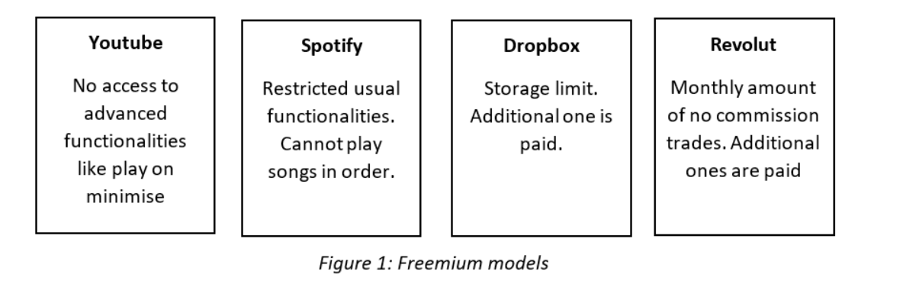

<p style = 'text-align: justify;'>The new Web3 paradigm may also hold important lessons in the wealth management space. In today's environment, with rising inflation expectations, VC and pre-IPO deals may have to become a bigger part of portfolios. In those markets, network effects are crucial. You need to be part of the inner circles to access the best deals. At the core of Web3 is a blockchain business model which rewards all participants who keep a decentralised network alive. This network is an immutable database that no one owns, but anyone can see and contribute. Such transparency could change the exclusive club mentality and broaden the reach for both investors and companies. Moreover, a company that develops a platform where everyone wins will undoubtedly gain market share. The days in which a sponsor of a SPAC automatically gets 20% of a target company seem numbered. [words: 323]</p>

## C

<p style = 'text-align: justify;'>Traditionally, people looking to manage their wealth would consult a financial advisor to plan investment strategies based on their risk tolerance. However, the cost of such human service can be significant, and advisors tend to prefer high-value clients with upfront capital. Robo-advisory is an automated solution that could be ideal for younger investors as it offers low fees and low balance entry. The underlying AI technology also keeps improving, considering it can now handle tax-loss harvesting and portfolio rebalancing. Researchers also continuously work on machine learning algorithms that can be utilised in these virtual advisors for better market predictions [9].
    
<p style = 'text-align: justify;'>Copy trading is another complementary service suitable for people who are busy watching the markets or want to leverage other traders' expertise. In such a case, algorithms automatically enable users to copy positions opened and managed by top-performing trades. The trades would be instantly replicated in the user's portfolio, and the invested value will be calculated as a proportion of the chosen amount to copy [10]. 
    
<p style = 'text-align: justify;'>Considering the recent blockchain trend, the business can also support new assets. For example, cryptocurrencies and NFTs are based on this technology and are becoming increasingly popular investments. Adding a staking functionality would further stimulate the buying of the former asset. However, entering this digital market would face a lot of competition from cryptocurrency exchanges. The largest one, Binance, issued a successful utility token for discounted trading and the incentive of holding it as its value increases due to a burning mechanism. This could be a strategy worth exploring to attract new clients. There is also a big challenge. In the age of cybercrime and regulators, any financial institution that wants to offer access to these assets has a fiduciary duty to build both a technologically robust solution and one that fits within the regulatory framework. Lastly, a decentralised exchange system can battle liquidity issues and the matching process of buyers and sellers on an order book. It implements an automated market maker that determines the asset price based on the state of the liquidity pool [11][12]. [words: 340]</p>

# References

1. Life expectancy - Wikipedia [Internet]. En.wikipedia.org. 2022 [cited 25 March 2022]. Available from: https://en.wikipedia.org/wiki/Life_expectancy
2. Life table - Wikipedia [Internet]. En.wikipedia.org. 2022 [cited 25 March 2022]. Available from: https://en.wikipedia.org/wiki/Life_table
3. Insurance Technologies: 13 Disruptive Ideas to Change Insurance Companies with Telematics, Blockchain, Machine Learning, and APIs [Internet]. AltexSoft. 2022 [cited 25 March 2022]. Available from: https://www.altexsoft.com/blog/insurance-technologies/
4. How InsurTech influences risk scoring and underwriting [Internet]. Infopulse. 2022 [cited 25 March 2022]. Available from: https://www.infopulse.com/blog/insurtech-risk-management-risk-scoring-underwriting
5. Bharadwaj R. An Overview of AI for Wealth Management - What's Possible Today? [Internet]. Emerj Artificial Intelligence Research. 2022 [cited 25 March 2022]. Available from: https://emerj.com/partner-content/an-overview-of-ai-for-wealth-management-whats-possible-today/
6. Harbor is the digital platform for alternative assets [Internet]. Harbor. 2022 [cited 25 March 2022]. Available from: https://harbor.com/platform
7. Pahwa A. What Is A Business Model? The 30 Types Explained [Internet]. Feedough. 2022 [cited 25 March 2022]. Available from: https://www.feedough.com/what-is-a-business-model/
8. What Is Freemium? [Internet]. Investopedia. 2022 [cited 25 March 2022]. Available from: https://www.investopedia.com/terms/f/freemium.asp
9. Trend 4: Digital risk reduction [Internet]. 2022 [cited 25 March 2022]. Available from: https://home.kpmg/xx/en/home/insights/2019/02/insurtech-10-digital-risk-reduction.html
10. What is Copy Trading & How Does it Work? | CMC Markets [Internet]. Cmcmarkets.com. 2022 [cited 25 March 2022]. Available from: https://www.cmcmarkets.com/en-gb/trading-guides/what-is-copy-trading
11. Binance Coin (BNB) Definition [Internet]. Investopedia. 2022 [cited 25 March 2022]. Available from: https://www.investopedia.com/terms/b/binance-coin-bnb.asp
12. What Is a Decentralized Exchange (DEX)? [Internet]. 2022 [cited 25 March 2022]. Available from: https://www.gemini.com/cryptopedia/decentralized-exchange-crypto-dex